In [1]:
import pandas as pd
import missingno as msno
from fuzzywuzzy import fuzz
from unidecode import unidecode

c:\Users\Renato\anaconda3\envs\Data_Science\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [5]:
teste = pd.DataFrame({'um':['são paulo','santo andré', 'são caetano',None, 'são bernardo'],'dois':['Sao Paulo','Sto Andre','Sao Caetano','São Bernóia','Sao Bernardo do Campo']})
teste

,um,dois
0,são paulo,Sao Paulo
1,santo andré,Sto Andre
2,são caetano,Sao Caetano
3,None,São Bernóia
4,são bernardo,Sao Bernardo do Campo


In [6]:
for index,row in teste.iterrows():
    if row['um']:
        teste.loc[index, "Score"] =  fuzz.ratio(unidecode(row['um'].lower()),unidecode(row['dois'].lower()))
teste

,um,dois,Score
0,são paulo,Sao Paulo,100.0
1,santo andré,Sto Andre,90.0
2,são caetano,Sao Caetano,100.0
3,None,São Bernóia,NaN
4,são bernardo,Sao Bernardo do Campo,73.0


In [2]:
df = pd.read_csv(r'App\base.csv', sep = ';', encoding = 'latin1')

<ipython-input-2-dd13301c0222>:1: DtypeWarning: Columns (92,93,123,153,155,156,180) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'App\base.csv', sep = ';', encoding = 'latin1')


Google Places

In [4]:
df_GMN = df[['companyName','endereço','gmapsAddress','URL Site','location','PARAM_CNPJ','PARAM_NOME','PARAM_LOCALIZACAO','gmapsCompanyName','gmapsCategory','Rating GMN','# Ratings GMN','gmapsTelephone','gmapsPlusCode','gmapsWebsite','URL GMN','matching_GMN','gmapsCompanyNameFuzzPartialRatio','gmapsCompanyNameFuzzTokenSort','gmapsCompanyNameFuzzTokenSet']][df['PARAM_CNPJ'].notna()]
# msno.matrix(df_GMN)
df_GMN[['PARAM_NOME','gmapsCompanyName','matching_GMN','gmapsCompanyNameFuzzPartialRatio','gmapsCompanyNameFuzzTokenSort','gmapsCompanyNameFuzzTokenSet']]


,PARAM_NOME,gmapsCompanyName,matching_GMN,gmapsCompanyNameFuzzPartialRatio,gmapsCompanyNameFuzzTokenSort,gmapsCompanyNameFuzzTokenSet
140,CLINICA GAIA PSICOLOGIA E ESPECIALIDADE MEDICAS,CLINICA GAIA - Psicologia e Especialidades Me...,94.0,94.0,99.0,99.0
154,VILA VIDA SERVICOS MEDICOS LTDA,Vila Vida Serviços Médicos Ltda,95.0,100.0,100.0,100.0
857,CLINICA DE REPOUSO BOM JESUS,Clínica Bom Jesus,71.0,65.0,76.0,100.0
1003,CLINICA MOURAO,Clínica Mourão,90.0,100.0,100.0,100.0
1101,NISE NUCLEO EM SAUDE MENTAL LTDA,Nise - Núcleo em Saúde Mental,88.0,89.0,92.0,100.0
...,...,...,...,...,...,...
20427,SERTRA CENTER MED,SERTRA CENTERMED,89.0,94.0,97.0,97.0
20601,ESPACO LIBERTE,Asa Norte Comércio Local Norte 110 BL A QUADR...,23.0,43.0,27.0,27.0
20667,NAS NUCLEO DE ATENCAO A SAUDE,Unimed Rio Claro - Núcleo de Atenção à Saúde,74.0,90.0,70.0,93.0
20922,INC PATIO BATEL,L'occitane,29.0,32.0,32.0,32.0


In [7]:
# Testando fuzzy com GMN
df_GMN['gmapsCompanyName'] = df_GMN['gmapsCompanyName'].astype(str)
df_GMN['gmapsCompanyName'] = df_GMN['gmapsCompanyName'].astype(str)
for index,row in df_GMN.iterrows():
    df_GMN.loc[index, "Score"] =  fuzz.ratio(unidecode(row['PARAM_NOME'].lower()),unidecode(row['gmapsCompanyName'].lower()))
    # conclusão, o matching_GMN é o fuzz.ratio

In [8]:
df_GMN[['PARAM_NOME','gmapsCompanyName','matching_GMN']].tail(5)

,PARAM_NOME,gmapsCompanyName,matching_GMN
20427,SERTRA CENTER MED,SERTRA CENTERMED,89.0
20601,ESPACO LIBERTE,Asa Norte Comércio Local Norte 110 BL A QUADR...,23.0
20667,NAS NUCLEO DE ATENCAO A SAUDE,Unimed Rio Claro - Núcleo de Atenção à Saúde,74.0
20922,INC PATIO BATEL,L'occitane,29.0
21000,UNIDADE DE DEPENDENCIA QUIMICA VIDA,Unidade De Dependência Química - Mansão Vida,85.0


Escavador

In [9]:
df_escav = df[['matching_escavador','nome_escavador','Razão Social']]
for index,row in df_escav.iterrows():
    if row['nome_escavador']:
        df_escav.loc[index, "Fuzzy_ratio"] =  fuzz.ratio(unidecode(row['nome_escavador'].lower()),unidecode(row['Razão Social'].lower()))
        df_escav.loc[index, "Fuzzy_partial_ratio"] =  fuzz.partial_ratio(unidecode(row['nome_escavador'].lower()),unidecode(row['Razão Social'].lower()))
        df_escav.loc[index, "Fuzzy_token_sort_ratio"] =  fuzz.token_sort_ratio(unidecode(row['nome_escavador'].lower()),unidecode(row['Razão Social'].lower()))
        df_escav.loc[index, "Fuzzy_token_set_ratio"] =  fuzz.token_set_ratio(unidecode(row['nome_escavador'].lower()),unidecode(row['Razão Social'].lower()))
df_escav.sort_values(by='Fuzzy_ratio').head(40)


<ipython-input-9-f2c496e970f7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_escav.loc[index, "Fuzzy_ratio"] =  fuzz.ratio(unidecode(row['nome_escavador'].lower()),unidecode(row['Razão Social'].lower()))
<ipython-input-9-f2c496e970f7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_escav.loc[index, "Fuzzy_partial_ratio"] =  fuzz.partial_ratio(unidecode(row['nome_escavador'].lower()),unidecode(row['Razão Social'].lower()))
<ipython-input-9-f2c496e970f7>:6: SettingWithCopyWarning: 
A value is trying

,matching_escavador,nome_escavador,Razão Social,Fuzzy_ratio,Fuzzy_partial_ratio,Fuzzy_token_sort_ratio,Fuzzy_token_set_ratio
16650,NaN,"Ipav Asfalto, Prestacao de Servico de Paviment...",IPAV,6.0,100.0,7.0,100.0
5997,NaN,Arad Administradora e Corretora de Seguros de ...,ARAD,14.0,100.0,14.0,100.0
8320,NaN,Associação de Pais e Amigos dos Excepcionais,APAE,17.0,50.0,12.0,12.0
1760,NaN,Associação de Pais e Amigos dos Excepcionais,APAE,17.0,50.0,12.0,12.0
9035,NaN,Associação de Pais e Amigos dos Excepcionais,APAE,17.0,50.0,12.0,12.0
10962,NaN,Instituto de Assistencia A Saude e Promocao So...,PROVIDA,18.0,100.0,19.0,100.0
8969,NaN,Associação de Pais e Amigos dos Excepcionais-T...,APAE TE,20.0,43.0,20.0,20.0
9257,NaN,Sindicato dos Trabalhadores no Serviço Público...,SISERP CRR,20.0,100.0,20.0,100.0
16230,NaN,Serviço Social da Indústria - SESI,SESI,21.0,100.0,22.0,100.0
814,NaN,Cemesp Centro Médico Especializado Pirapetinga...,CEMESP,21.0,100.0,21.0,100.0


CNES vs RF

In [19]:
# Nome Fantasia
df[['Nome Fantasia','fantasia']].info()#muitos nomes fantasias da RF nulos
df['Nome Fantasia'] = df['Nome Fantasia'].astype(str)
df['fantasia'] = df['fantasia'].astype(str)
for index,row in df.iterrows():
    if row['fantasia']:
        df.loc[index, "Fuzzy_Fantasia_CNESvsRF"] =  fuzz.ratio(unidecode(row['Nome Fantasia'].lower()),unidecode(row['fantasia'].lower()))
        df.loc[index, "Fuzzy_partial_ratio_Fantasia_CNESvsRF"] =  fuzz.partial_ratio(unidecode(row['Nome Fantasia'].lower()),unidecode(row['fantasia'].lower()))
        df.loc[index, "Fuzzy_token_sort_ratio_Fantasia_CNESvsRF"] =  fuzz.token_sort_ratio(unidecode(row['Nome Fantasia'].lower()),unidecode(row['fantasia'].lower()))
        df.loc[index, "Fuzzy_token_set_ratio_Fantasia_CNESvsRF"] =  fuzz.token_set_ratio(unidecode(row['Nome Fantasia'].lower()),unidecode(row['fantasia'].lower()))
df[['Nome Fantasia','fantasia','Fuzzy_ratio_Fantasia_CNESvsRF',"Fuzzy_partial_ratio_Fantasia_CNESvsRF","Fuzzy_token_sort_ratio_Fantasia_CNESvsRF","Fuzzy_token_set_ratio_Fantasia_CNESvsRF"]][df['fantasia']!='nan'].sort_values(by='Fuzzy_ratio_Fantasia_CNESvsRF',ascending=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21053 entries, 0 to 21052
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Nome Fantasia  21053 non-null  object
 1   fantasia       21053 non-null  object
dtypes: object(2)
memory usage: 329.1+ KB


,Nome Fantasia,fantasia,Fuzzy_ratio_Fantasia_CNESvsRF,Fuzzy_partial_ratio_Fantasia_CNESvsRF,Fuzzy_token_sort_ratio_Fantasia_CNESvsRF,Fuzzy_token_set_ratio_Fantasia_CNESvsRF
0,CENTRAL IMAGEM CLINICA MEDICA,CENTRAL IMAGEM CLINICA MEDICA,100.0,100.0,100.0,100.0
12374,ASSOCIACAO PESTALOZZI DE CUIABA,ASSOCIACAO PESTALOZZI DE CUIABA,100.0,100.0,100.0,100.0
12343,PSICODONTO,PSICODONTO,100.0,100.0,100.0,100.0
12349,CLINICA CORTEZ,CLINICA CORTEZ,100.0,100.0,100.0,100.0
12353,VITACLIN INTERAGINDO,VITACLIN INTERAGINDO,100.0,100.0,100.0,100.0
...,...,...,...,...,...,...
3283,VIDA ITU,#NOME?,0.0,0.0,0.0,0.0
3270,PRONEFRON,DAVITA,0.0,0.0,0.0,0.0
13273,CISA,PROPREV,0.0,0.0,0.0,0.0
19073,S E R TAUBATE,.,0.0,0.0,0.0,0.0


In [24]:
#Razão Social
df[['Razão Social','nome:1']].info()
df['Razão Social'] = df['Razão Social'].astype(str)
df['nome:1'] = df['nome:1'].astype(str)
for index,row in df.iterrows():
    if row['nome:1']:
        df.loc[index, "Fuzzy_Razão_CNESvsRF"] =  fuzz.ratio(unidecode(row['Razão Social'].lower()),unidecode(row['nome:1'].lower()))
        df.loc[index, "Fuzzy_partial_ratio_Razão_CNESvsRF"] =  fuzz.partial_ratio(unidecode(row['Razão Social'].lower()),unidecode(row['nome:1'].lower()))
        df.loc[index, "Fuzzy_token_sort_ratio_Razão_CNESvsRF"] =  fuzz.token_sort_ratio(unidecode(row['Razão Social'].lower()),unidecode(row['nome:1'].lower()))
        df.loc[index, "Fuzzy_token_set_ratio_Razão_CNESvsRF"] =  fuzz.token_set_ratio(unidecode(row['Razão Social'].lower()),unidecode(row['nome:1'].lower()))
df[['Razão Social','nome:1','Fuzzy_Razão_CNESvsRF',"Fuzzy_partial_ratio_Razão_CNESvsRF","Fuzzy_token_sort_ratio_Razão_CNESvsRF","Fuzzy_token_set_ratio_Razão_CNESvsRF"]][df['nome:1']!='nan'].sort_values(by='Fuzzy_Razão_CNESvsRF',ascending=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21053 entries, 0 to 21052
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Razão Social  21053 non-null  object
 1   nome:1        21053 non-null  object
dtypes: object(2)
memory usage: 329.1+ KB


,Razão Social,nome:1,Fuzzy_Razão_CNESvsRF,Fuzzy_partial_ratio_Razão_CNESvsRF,Fuzzy_token_sort_ratio_Razão_CNESvsRF,Fuzzy_token_set_ratio_Razão_CNESvsRF
5632,CLINICA ATIQUE CEREBRO E COLUNA LTDA,CLINICA ATIQUE CEREBRO E COLUNA LTDA,100.0,100.0,100.0,100.0
6982,MEDICINA E CIRURGIA CENTER LTDA,MEDICINA E CIRURGIA CENTER LTDA,100.0,100.0,100.0,100.0
6985,FERNANDA DA CUNHA MAJESKI,FERNANDA DA CUNHA MAJESKI,100.0,100.0,100.0,100.0
15156,ISG INSTITUTO DE SAUDE DE GUARAPUAVA EIRELI,ISG INSTITUTO DE SAUDE DE GUARAPUAVA EIRELI,100.0,100.0,100.0,100.0
15149,SIMONE ALVES DE MELO FERREIRA,SIMONE ALVES DE MELO FERREIRA,100.0,100.0,100.0,100.0
...,...,...,...,...,...,...
13401,LUMEN CLINICA DE REABILITACAO E EDUCACAO ESPEC...,KANOA SPORT WEAR EIRELI,10.0,39.0,26.0,26.0
12509,CREDEQ FAZENDA TORRE FORTE ME,MAX PROBST NETO REABILITACOES,10.0,14.0,10.0,10.0
5997,ARAD,ASSOCIACAO DE RECUPERACAO E PREVENCAO DO ALCOO...,10.0,100.0,11.0,100.0
6607,CLINICA 2 DE ORIENTACAO PSICOSSOCIAL LTDA,ALFREDO SANT'ANNA ROCHA - EIRELI,8.0,21.0,25.0,25.0


In [27]:
#Logradouro
df[['Logradouro','logradouro']].info()
df['Logradouro'] = df['Logradouro'].astype(str)
df['logradouro'] = df['logradouro'].astype(str)
for index,row in df.iterrows():
    if row['logradouro']:
        df.loc[index, "Fuzzy_Logradouro_CNESvsRF"] =  fuzz.ratio(unidecode(row['Logradouro'].lower()),unidecode(row['logradouro'].lower()))
        df.loc[index, "Fuzzy_partial_ratio_Logradouro_CNESvsRF"] =  fuzz.partial_ratio(unidecode(row['Logradouro'].lower()),unidecode(row['logradouro'].lower()))
        df.loc[index, "Fuzzy_token_sort_ratio_Logradouro_CNESvsRF"] =  fuzz.token_sort_ratio(unidecode(row['Logradouro'].lower()),unidecode(row['logradouro'].lower()))
        df.loc[index, "Fuzzy_token_set_ratio_Logradouro_CNESvsRF"] =  fuzz.token_set_ratio(unidecode(row['Logradouro'].lower()),unidecode(row['logradouro'].lower()))
df[['Logradouro','logradouro','Fuzzy_Logradouro_CNESvsRF',"Fuzzy_partial_ratio_Logradouro_CNESvsRF","Fuzzy_token_sort_ratio_Logradouro_CNESvsRF","Fuzzy_token_set_ratio_Logradouro_CNESvsRF"]][df['logradouro']!='nan'].sort_values(by='Fuzzy_Logradouro_CNESvsRF',ascending=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21053 entries, 0 to 21052
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Logradouro  21053 non-null  object
 1   logradouro  19095 non-null  object
dtypes: object(2)
memory usage: 329.1+ KB


,Logradouro,logradouro,Fuzzy_Logradouro_CNESvsRF,Fuzzy_partial_ratio_Logradouro_CNESvsRF,Fuzzy_token_sort_ratio_Logradouro_CNESvsRF,Fuzzy_token_set_ratio_Logradouro_CNESvsRF
13416,Q QNC 11 LOTE,Q QNC 11 LOTE,100.0,100.0,100.0,100.0
1901,AV SOLEDADE,AV SOLEDADE,100.0,100.0,100.0,100.0
5781,AV PASTOR ADEMIR DIAS DUARTE,AV PASTOR ADEMIR DIAS DUARTE,100.0,100.0,100.0,100.0
18761,AL SANTOS,AL SANTOS,100.0,100.0,100.0,100.0
5784,AV BANDEIRANTES,AV BANDEIRANTES,100.0,100.0,100.0,100.0
...,...,...,...,...,...,...
6085,RUA F,#NOME?,0.0,0.0,0.0,0.0
7096,40,R MIL E QUARENTA E TRES,0.0,0.0,0.0,0.0
16416,1,AV TRES,0.0,0.0,0.0,0.0
120,18,AV 24,0.0,0.0,0.0,0.0


In [30]:
#Numero do endereço
df[['Número do endereço','numero']].info()
df['Número do endereço'] = df['Número do endereço'].astype(str)
df['numero'] = df['numero'].astype(str)
for index,row in df.iterrows():
    if row['numero']:
        df.loc[index, "Fuzzy_Número_CNESvsRF"] =  fuzz.ratio(unidecode(row['Número do endereço'].lower()),unidecode(row['numero'].lower()))
        df.loc[index, "Fuzzy_partial_ratio_Número_CNESvsRF"] =  fuzz.partial_ratio(unidecode(row['Número do endereço'].lower()),unidecode(row['numero'].lower()))
        df.loc[index, "Fuzzy_token_sort_ratio_Número_CNESvsRF"] =  fuzz.token_sort_ratio(unidecode(row['Número do endereço'].lower()),unidecode(row['numero'].lower()))
        df.loc[index, "Fuzzy_token_set_ratio_Número_CNESvsRF"] =  fuzz.token_set_ratio(unidecode(row['Número do endereço'].lower()),unidecode(row['numero'].lower()))
df[['Número do endereço','numero','Fuzzy_Número_CNESvsRF',"Fuzzy_partial_ratio_Número_CNESvsRF","Fuzzy_token_sort_ratio_Número_CNESvsRF","Fuzzy_token_set_ratio_Número_CNESvsRF"]][df['numero']!='nan'].sort_values(by='Fuzzy_Número_CNESvsRF',ascending=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21053 entries, 0 to 21052
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Número do endereço  21049 non-null  object
 1   numero              19084 non-null  object
dtypes: object(2)
memory usage: 329.1+ KB


,Número do endereço,numero,Fuzzy_Número_CNESvsRF,Fuzzy_partial_ratio_Número_CNESvsRF,Fuzzy_token_sort_ratio_Número_CNESvsRF,Fuzzy_token_set_ratio_Número_CNESvsRF
0,52,52,100.0,100.0,100.0,100.0
13337,515,515,100.0,100.0,100.0,100.0
13319,6600,6600,100.0,100.0,100.0,100.0
13320,2769,2769,100.0,100.0,100.0,100.0
13321,803,803,100.0,100.0,100.0,100.0
...,...,...,...,...,...,...
19573,65,113,0.0,0.0,0.0,0.0
3662,S/N,1300,0.0,0.0,0.0,0.0
12506,840,335,0.0,0.0,0.0,0.0
3656,0,1 A 4,0.0,0.0,0.0,0.0


In [33]:
#Município
df[['Município','municipio']].info()
df['Município'] = df['Município'].astype(str)
df['municipio'] = df['municipio'].astype(str)
for index,row in df.iterrows():
    if row['municipio']:
        df.loc[index, "Fuzzy_Município_CNESvsRF"] =  fuzz.ratio(unidecode(row['Município'].lower()),unidecode(row['municipio'].lower()))
        df.loc[index, "Fuzzy_partial_ratio_Município_CNESvsRF"] =  fuzz.partial_ratio(unidecode(row['Município'].lower()),unidecode(row['municipio'].lower()))
        df.loc[index, "Fuzzy_token_sort_ratio_Município_CNESvsRF"] =  fuzz.token_sort_ratio(unidecode(row['Município'].lower()),unidecode(row['municipio'].lower()))
        df.loc[index, "Fuzzy_token_set_ratio_Município_CNESvsRF"] =  fuzz.token_set_ratio(unidecode(row['Município'].lower()),unidecode(row['municipio'].lower()))
df[['Município','municipio','Fuzzy_Município_CNESvsRF',"Fuzzy_partial_ratio_Município_CNESvsRF","Fuzzy_token_sort_ratio_Município_CNESvsRF","Fuzzy_token_set_ratio_Município_CNESvsRF"]][df['municipio']!='nan'].sort_values(by='Fuzzy_Município_CNESvsRF',ascending=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21053 entries, 0 to 21052
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Município  21053 non-null  object
 1   municipio  19094 non-null  object
dtypes: object(2)
memory usage: 329.1+ KB


,Município,municipio,Fuzzy_Município_CNESvsRF,Fuzzy_partial_ratio_Município_CNESvsRF,Fuzzy_token_sort_ratio_Município_CNESvsRF,Fuzzy_token_set_ratio_Município_CNESvsRF
0,BRASILIA,BRASILIA,100.0,100.0,100.0,100.0
13935,DUQUE DE CAXIAS,DUQUE DE CAXIAS,100.0,100.0,100.0,100.0
13933,RECIFE,RECIFE,100.0,100.0,100.0,100.0
13932,CONCEICAO DO RIO VERDE,CONCEICAO DO RIO VERDE,100.0,100.0,100.0,100.0
13931,FORTALEZA,FORTALEZA,100.0,100.0,100.0,100.0
...,...,...,...,...,...,...
17233,SAO JOSE,FLORIANOPOLIS,10.0,22.0,19.0,19.0
9966,CATANDUVA,NOVO HORIZONTE,9.0,15.0,26.0,26.0
456,SALVADOR,LAURO DE FREITAS,8.0,22.0,25.0,25.0
10714,BOZANO,IJUI,0.0,0.0,0.0,0.0


In [36]:
#UF
df[['UF','uf']].info()
df['UF'] = df['UF'].astype(str)
df['uf'] = df['uf'].astype(str)
for index,row in df.iterrows():
    if row['uf']:
        df.loc[index, "Fuzzy_UF_CNESvsRF"] =  fuzz.ratio(unidecode(row['UF'].lower()),unidecode(row['uf'].lower()))
        df.loc[index, "Fuzzy_partial_ratio_UF_CNESvsRF"] =  fuzz.partial_ratio(unidecode(row['UF'].lower()),unidecode(row['uf'].lower()))
        df.loc[index, "Fuzzy_token_sort_ratio_UF_CNESvsRF"] =  fuzz.token_sort_ratio(unidecode(row['UF'].lower()),unidecode(row['uf'].lower()))
        df.loc[index, "Fuzzy_token_set_ratio_UF_CNESvsRF"] =  fuzz.token_set_ratio(unidecode(row['UF'].lower()),unidecode(row['uf'].lower()))
df[['UF','uf','Fuzzy_UF_CNESvsRF',"Fuzzy_partial_ratio_UF_CNESvsRF","Fuzzy_token_sort_ratio_UF_CNESvsRF","Fuzzy_token_set_ratio_UF_CNESvsRF"]][df['uf']!='nan'].sort_values(by='Fuzzy_UF_CNESvsRF',ascending=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21053 entries, 0 to 21052
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   UF      21053 non-null  object
 1   uf      19094 non-null  object
dtypes: object(2)
memory usage: 329.1+ KB


,UF,uf,Fuzzy_UF_CNESvsRF,Fuzzy_partial_ratio_UF_CNESvsRF,Fuzzy_token_sort_ratio_UF_CNESvsRF,Fuzzy_token_set_ratio_UF_CNESvsRF
0,DF,DF,100.0,100.0,100.0,100.0
13972,PR,PR,100.0,100.0,100.0,100.0
13970,AL,AL,100.0,100.0,100.0,100.0
13968,SC,SC,100.0,100.0,100.0,100.0
13967,SP,SP,100.0,100.0,100.0,100.0
...,...,...,...,...,...,...
10790,SC,PR,0.0,0.0,0.0,0.0
3648,MG,SP,0.0,0.0,0.0,0.0
3705,MG,SP,0.0,0.0,0.0,0.0
11314,BA,MG,0.0,0.0,0.0,0.0


<AxesSubplot:>

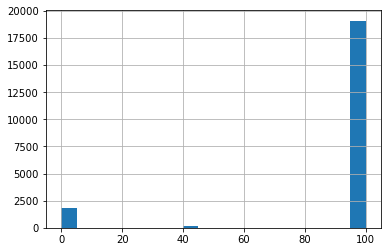

In [40]:
df['Fuzzy_UF_CNESvsRF'].hist(bins=20)